In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [305]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/spo2 vs r-r values/4000-remaining.csv")

In [306]:
df.head(1000)

,SpO2,rrvalues
0,85.2589,0.663
1,85.2590,0.667
2,85.2576,0.675
3,85.2593,0.682
4,85.2597,0.684
...,...,...
995,95.2980,0.781
996,95.2995,0.758
997,96.0092,0.747
998,96.9999,0.761


In [307]:
df.describe()

,SpO2,rrvalues
count,1112.000000,1112.000000
mean,87.341278,0.719023
std,5.853043,0.065043
min,81.240600,0.583000
25%,82.246800,0.671000
50%,84.254000,0.705000
75%,93.292325,0.767000
max,97.306600,1.409000


In [308]:
df.shape

(1112, 2)

In [309]:
cdf = df[['SpO2','rrvalues']]
cdf.head(5)

,SpO2,rrvalues
0,85.2589,0.663
1,85.2590,0.667
2,85.2576,0.675
3,85.2593,0.682
4,85.2597,0.684


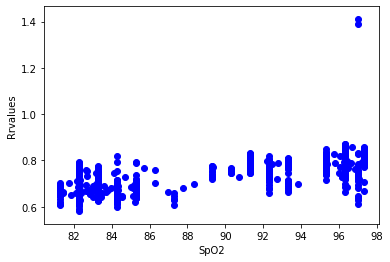

In [310]:
#graph of SNO vs r-r values

plt.scatter(cdf.SpO2, cdf.rrvalues,color='blue')
plt.xlabel('SpO2')
plt.ylabel('Rrvalues')
plt.show()

In [311]:
#splitting our data in 80-20 ratio for regression

In [312]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

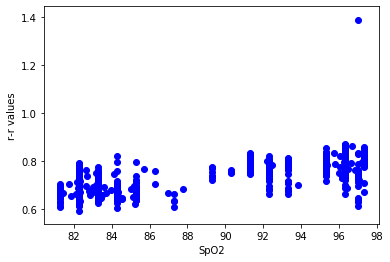

In [313]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
plt.xlabel("SpO2")
plt.ylabel("r-r values")
plt.show()

In [314]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['SpO2']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00754057]]
Intercept:  [0.06062673]


Text(0, 0.5, 'r-r values')

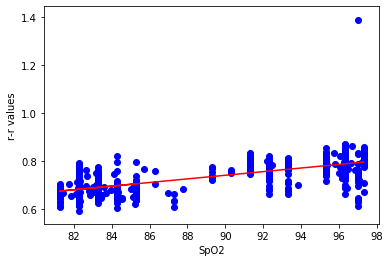

In [315]:
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SpO2")
plt.ylabel("r-r values")

In [316]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['SpO2']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -0.60


In [317]:
#using polynomial regression

In [318]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['SpO2']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['SpO2']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 8.52589000e+01, 7.26908003e+03],
       [1.00000000e+00, 8.52576000e+01, 7.26885836e+03],
       [1.00000000e+00, 8.52593000e+01, 7.26914824e+03],
       ...,
       [1.00000000e+00, 9.73060000e+01, 9.46845764e+03],
       [1.00000000e+00, 9.73063000e+01, 9.46851602e+03],
       [1.00000000e+00, 9.73058000e+01, 9.46841871e+03]])

In [319]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.03600101  0.00024397]]
Intercept:  [1.99407201]


Text(0, 0.5, 'r-rvalues')

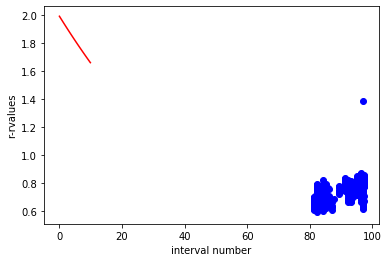

In [320]:
#plotting the polynomial regression
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("interval number")
plt.ylabel("r-rvalues")

In [321]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -0.56
